In [58]:
%matplotlib notebook
from linearmodels import PanelOLS
import pandas as pd

In [2]:
feature_dir = 'data/features/'

In [3]:
df_twitter = pd.read_csv(feature_dir+'twitter_features.csv', parse_dates=['Date'])
df_news = pd.read_csv(feature_dir+'news_features.csv', parse_dates=['Date'])
df_out= pd.read_csv(feature_dir+'stock_features.csv', parse_dates=['Date'])

In [4]:
df = pd.merge(df_out, df_twitter, how='left', on='Date')
df = pd.merge(df, df_news, how='left', on='Date')

In [5]:
df = df.fillna(0)

In [6]:
df

,Date,AAPL_Change,AAPL_Lag 2 Significant,stock_x,GOOG_Change,GOOG_Lag 2 Significant,stock_y,MSFT_Change,MSFT_Lag 2 Significant,stock,...,Trump_sentiment_score,Trump_heuristic_score,New York Times_sentiment_score,New York Times_polar_score,CNN_sentiment_score,CNN_polar_score,Washington Post_sentiment_score,Washington Post_polar_score,NYT_sentiment_score,NYT_polar_score
0,2015-01-02,-0.012675,-1,AAPL,-0.004216,-1,GOOG,-0.001498,0,MSFT,...,31.0612,106.794357,0.0,0.0,-6.3481,-0.1492,0.0,0.0,-8.5101,-0.0970
1,2015-01-05,-0.027830,-1,AAPL,-0.010869,-1,GOOG,-0.006215,0,MSFT,...,49.6462,177.616544,0.0,0.0,-1.4093,-0.8519,0.0,0.0,9.4768,0.0937
2,2015-01-06,-0.016160,1,AAPL,-0.015786,-1,GOOG,0.000216,0,MSFT,...,37.9385,114.107390,0.0,0.0,1.0081,0.1651,0.0,0.0,-5.3850,-0.1756
3,2015-01-07,0.006195,1,AAPL,-0.015534,0,GOOG,-0.008624,1,MSFT,...,3.2739,2.292712,0.0,0.0,-0.9171,-0.4767,0.0,0.0,-23.5856,0.1026
4,2015-01-08,0.018937,1,AAPL,-0.017771,0,GOOG,0.016746,1,MSFT,...,4.9556,12.653774,0.0,0.0,-2.5206,-0.7003,0.0,0.0,-9.8248,-0.0730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2019-04-24,0.014333,-1,AAPL,0.010738,0,GOOG,0.013618,1,MSFT,...,4.2964,47.781231,0.0,0.0,0.0000,0.0000,0.0,0.0,-9.0002,-0.1125
1084,2019-04-25,-0.002556,-1,AAPL,0.000514,0,GOOG,0.033945,0,MSFT,...,-4.5359,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,-11.8098,0.0418
1085,2019-04-26,-0.009331,0,AAPL,0.003344,-1,GOOG,-0.002768,0,MSFT,...,5.7630,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,-30.7923,-0.2229
1086,2019-04-29,-0.002440,1,AAPL,0.003940,-1,GOOG,0.001542,0,MSFT,...,3.9038,-inf,0.0,0.0,0.0000,0.0000,0.0,0.0,-36.7499,-0.1281


In [7]:
data = df.set_index(['Date'])
data = df.reset_index().set_index(['stock','Date'])
# data = df.reset_index().set_index(['Date'])


In [8]:
data.max()

index                                  1087
AAPL_Change                        0.171182
AAPL_Lag 2 Significant                    1
stock_x                                AAPL
GOOG_Change                        0.148429
GOOG_Lag 2 Significant                    1
stock_y                                GOOG
MSFT_Change                        0.100358
MSFT_Lag 2 Significant                    1
BarackObama_sentiment_score         11.9336
BarackObama_heuristic_score         94.4974
cnnbrk_sentiment_score              10.4604
cnnbrk_heuristic_score                  inf
KimKardashian_sentiment_score       10.2934
KimKardashian_heuristic_score        96.462
Trump_sentiment_score               49.6462
Trump_heuristic_score                   inf
New York Times_sentiment_score        5.789
New York Times_polar_score           1.0212
CNN_sentiment_score                  2.2713
CNN_polar_score                      1.6804
Washington Post_sentiment_score      3.6822
Washington Post_polar_score     

In [9]:
data

index  AAPL_Change  AAPL_Lag 2 Significant stock_x  \
stock Date                                                             
MSFT  2015-01-02      0    -0.012675                      -1    AAPL   
      2015-01-05      1    -0.027830                      -1    AAPL   
      2015-01-06      2    -0.016160                       1    AAPL   
      2015-01-07      3     0.006195                       1    AAPL   
      2015-01-08      4     0.018937                       1    AAPL   
...                 ...          ...                     ...     ...   
      2019-04-24   1083     0.014333                      -1    AAPL   
      2019-04-25   1084    -0.002556                      -1    AAPL   
      2019-04-26   1085    -0.009331                       0    AAPL   
      2019-04-29   1086    -0.002440                       1    AAPL   
      2019-04-30   1087    -0.006556                       1    AAPL   

                  GOOG_Change  GOOG_Lag 2 Significant stock_y  MSFT_Change  \
stock Date                                                                   
MSFT  2015-01-02    -0.004216                      -1    GOOG    -0.001498   
      2015-01-05    -0.010869                      -1    GOOG    -0.006215   
      2015-01-06    -0.015786                      -1    GOOG     0.000216   
      2015-01-07    -0.015534                       0    GOOG    -0.008624   
      2015-01-08    -0.017771                       0    GOOG     0.016746   
...                       ...                     ...     ...          ...   
      2019-04-24     0.010738                       0    GOOG     0.013618   
      2019-04-25     0.000514                       0    GOOG     0.033945   
      2019-04-26     0.003344                      -1    GOOG    -0.002768   
      2019-04-29     0.003940                      -1    GOOG     0.001542   
      2019-04-30    -0.069859                      -1    GOOG    -0.000693   

                  MSFT_Lag 2 Significant  BarackObama_sentiment_score  ...  \
stock Date                                                             ...   
MSFT  2015-01-02                       0                      -0.4289  ...   
      2015-01-05                       0                       1.2205  ...   
      2015-01-06                       0                       0.6436  ...   
      2015-01-07                       1                       5.6336  ...   
      2015-01-08                       1                       1.1121  ...   
...                                  ...                          ...  ...   
      2019-04-24                       1                       0.0000  ...   
      2019-04-25                       0                       0.0000  ...   
      2019-04-26                       0                       0.0000  ...   
      2019-04-29                       0                       0.0000  ...   
      2019-04-30                      -1                       0.0000  ...   

                  Trump_sentiment_score  Trump_heuristic_score  \
stock Date                                                       
MSFT  2015-01-02                31.0612             106.794357   
      2015-01-05                49.6462             177.616544   
      2015-01-06                37.9385             114.107390   
      2015-01-07                 3.2739               2.292712   
      2015-01-08                 4.9556              12.653774   
...                                 ...                    ...   
      2019-04-24                 4.2964              47.781231   
      2019-04-25                -4.5359               0.000000   
      2019-04-26                 5.7630               0.000000   
      2019-04-29                 3.9038                   -inf   
      2019-04-30                 0.6687               5.871304   

                  New York Times_sentiment_score  New York Times_polar_score  \
stock Date                                                                     
MSFT  2015-01-02                

In [10]:
data_exog = data[['New York Times_sentiment_score','CNN_sentiment_score', 'Washington Post_sentiment_score']]

In [11]:
data_exog

New York Times_sentiment_score  CNN_sentiment_score  \
stock Date                                                              
MSFT  2015-01-02                             0.0              -6.3481   
      2015-01-05                             0.0              -1.4093   
      2015-01-06                             0.0               1.0081   
      2015-01-07                             0.0              -0.9171   
      2015-01-08                             0.0              -2.5206   
...                                          ...                  ...   
      2019-04-24                             0.0               0.0000   
      2019-04-25                             0.0               0.0000   
      2019-04-26                             0.0               0.0000   
      2019-04-29                             0.0               0.0000   
      2019-04-30                             0.0               0.0000   

                  Washington Post_sentiment_score  
stock Date                                         
MSFT  2015-01-02                              0.0  
      2015-01-05                              0.0  
      2015-01-06                              0.0  
      2015-01-07                              0.0  
      2015-01-08                              0.0  
...                                           ...  
      2019-04-24                              0.0  
      2019-04-25                              0.0  
      2019-04-26                              0.0  
      2019-04-29                              0.0  
      2019-04-30                              0.0  

[1088 rows x 3 columns]

In [13]:
data_dependent = data['MSFT_Change']

In [14]:
data_dependent

stock  Date      
MSFT   2015-01-02   -0.001498
       2015-01-05   -0.006215
       2015-01-06    0.000216
       2015-01-07   -0.008624
       2015-01-08    0.016746
                       ...   
       2019-04-24    0.013618
       2019-04-25    0.033945
       2019-04-26   -0.002768
       2019-04-29    0.001542
       2019-04-30   -0.000693
Name: MSFT_Change, Length: 1088, dtype: float64

In [16]:
model = PanelOLS(data['MSFT_Change'],data_exog,entity_effects=True, time_effects=True)
res = model.fit()
res

In [136]:
from datetime import datetime

def gen_year_month(row):
    return '{}-{}'.format(row['Date'].year, str(row['Date'].month).zfill(2))
    #return datetime.strptime(string, '%Y-%m')


df_index = pd.read_csv(feature_dir+'index_features.csv', parse_dates=['Date'])
df_index['year-month'] = df_index.apply(gen_year_month, axis=1)
df_index = df_index.set_index(['year-month', 'Date'])
#df_index = df_index.loc['2017-01-01':'2017-02-01']
df_index

Change VIX  Direction VIX  Lag 1 Change VIX  \
year-month Date                                                      
2015-01    2015-01-02    0.116279              1          0.080518   
           2015-01-05    0.080518              1          0.059406   
           2015-01-06    0.059406              1         -0.008854   
           2015-01-07   -0.008854             -1         -0.110174   
           2015-01-08   -0.110174             -1         -0.083101   
...                           ...            ...               ...   
2019-04    2019-04-24   -0.010269             -1          0.060654   
           2019-04-25    0.060654              1          0.011287   
           2019-04-26    0.011287              1         -0.029762   
           2019-04-29   -0.029762             -1          0.005368   
           2019-04-30    0.005368              1         -0.019069   

                       Lag 1 Direction VIX  Lag 2 Change VIX  \
year-month Date                                                
2015-01    2015-01-02                    1          0.144707   
           2015-01-05                    1          0.050026   
           2015-01-06                   -1         -0.118052   
           2015-01-07                   -1         -0.184119   
           2015-01-08                   -1          0.005020   
...                                    ...               ...   
2019-04    2019-04-24                    1          0.072626   
           2019-04-25                    1         -0.018811   
           2019-04-26                   -1         -0.024554   
           2019-04-29                    1         -0.013804   
           2019-04-30                   -1          0.094584   

                       Lag 2 Direction VIX  Lag 2 Significant VIX  \
year-month Date                                                     
2015-01    2015-01-02                    1                      1   
           2015-01-05                    1                      1   
           2015-01-06                   -1                     -1   
           2015-01-07                   -1                     -1   
           2015-01-08                    1                      0   
...                                    ...                    ...   
2019-04    2019-04-24                    1                      1   
           2019-04-25                   -1                     -1   
           2019-04-26                   -1                     -1   
           2019-04-29                   -1                     -1   
           2019-04-30                    1                      1   

                       Lag 5 Change VIX  Lag 5 Direction VIX  Change SPY  \
year-month Date                                                            
2015-01    2015-01-02          0.144707                    1   -0.007741   
           2015-01-05          0.050026                    1   -0.010708   
           2015-01-06         -0.118052                   -1   -0.010188   
           2015-01-07         -0.184119                   -1   -0.003315   
           2015-01-08          0.005020                    1    0.012859   
...                                 ...                  ...         ...   
2019-04    2019-04-24          0.072626                    1    0.007259   
           2019-04-25         -0.018811                   -1   -0.002288   
           2019-04-26         -0.024554                   -1   -0.000068   
           2019-04-29         -0.013804                   -1    0.004827   
           2019-04-30          0.094584                    1   -0.000068   

                       Direction SPY  Lag 1 Change SPY  Lag 1 Direction SPY  \
year-month Date                                                               
2015-01    2015-01-02             -1         -0.010708                   -1   
           2015-01-05             -1         -0.010188                   -1   
           2015-01-06             -1         -0.003315                   -1 

In [78]:
df['year-month'] = df.apply(gen_year_month, axis=1)
data = df.reset_index().set_index(['year-month', 'Date'])
#data_exog = data[['New York Times_sentiment_score','CNN_sentiment_score', 'Washington Post_sentiment_score']]
data

index  AAPL_Change  AAPL_Lag 2 Significant stock_x  \
year-month Date                                                             
2015-01    2015-01-02      0    -0.012675                      -1    AAPL   
           2015-01-05      1    -0.027830                      -1    AAPL   
           2015-01-06      2    -0.016160                       1    AAPL   
           2015-01-07      3     0.006195                       1    AAPL   
           2015-01-08      4     0.018937                       1    AAPL   
...                      ...          ...                     ...     ...   
2019-04    2019-04-24   1083     0.014333                      -1    AAPL   
           2019-04-25   1084    -0.002556                      -1    AAPL   
           2019-04-26   1085    -0.009331                       0    AAPL   
           2019-04-29   1086    -0.002440                       1    AAPL   
           2019-04-30   1087    -0.006556                       1    AAPL   

                       GOOG_Change  GOOG_Lag 2 Significant stock_y  \
year-month Date                                                      
2015-01    2015-01-02    -0.004216                      -1    GOOG   
           2015-01-05    -0.010869                      -1    GOOG   
           2015-01-06    -0.015786                      -1    GOOG   
           2015-01-07    -0.015534                       0    GOOG   
           2015-01-08    -0.017771                       0    GOOG   
...                            ...                     ...     ...   
2019-04    2019-04-24     0.010738                       0    GOOG   
           2019-04-25     0.000514                       0    GOOG   
           2019-04-26     0.003344                      -1    GOOG   
           2019-04-29     0.003940                      -1    GOOG   
           2019-04-30    -0.069859                      -1    GOOG   

                       MSFT_Change  MSFT_Lag 2 Significant stock  ...  \
year-month Date                                                   ...   
2015-01    2015-01-02    -0.001498                       0  MSFT  ...   
           2015-01-05    -0.006215                       0  MSFT  ...   
           2015-01-06     0.000216                       0  MSFT  ...   
           2015-01-07    -0.008624                       1  MSFT  ...   
           2015-01-08     0.016746                       1  MSFT  ...   
...                            ...                     ...   ...  ...   
2019-04    2019-04-24     0.013618                       1  MSFT  ...   
           2019-04-25     0.033945                       0  MSFT  ...   
           2019-04-26    -0.002768                       0  MSFT  ...   
           2019-04-29     0.001542                       0  MSFT  ...   
           2019-04-30    -0.000693                      -1  MSFT  ...   

                       Trump_sentiment_score  Trump_heuristic_score  \
year-month Date                                                       
2015-01    2015-01-02                31.0612             106.794357   
           2015-01-05                49.6462             177.616544   
           2015-01-06                37.9385             114.107390   
           2015-01-07                 3.2739               2.292712   
           2015-01-08                 4.9556              12.653774   
...                                      ...                    ...   
2019-04    2019-04-24                 4.2964              47.781231   
           2019-04-25                -4.5359               0.000000   
           2019-04-26                 5.7630               0.000000   
           2019-04-29                 3.9038                   -inf   
           2019-04-30                 0.6687               5.871304   

                       New York Times_sentiment_score  \
year-month Date                                         
2015-01    2015-01-02                             0.0   
           2015-01-05                             0.0   
        

<IPython.core.display.Javascript object>


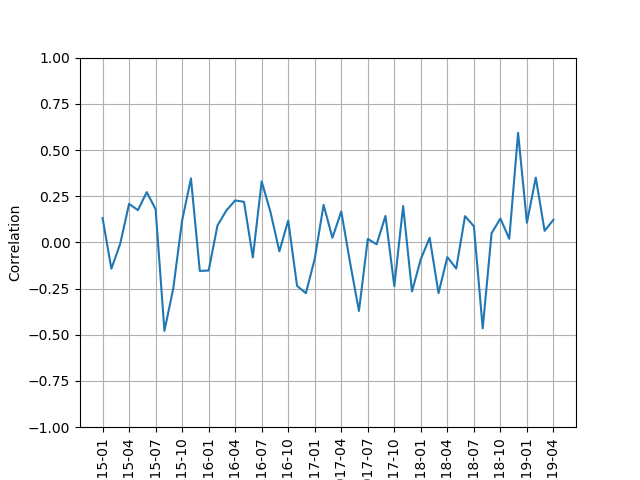

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt  
import numpy as np  

yearMonths = sorted(list(set([i[0] for i in data.index.tolist()])))
scores = []
for ym in yearMonths:
    '''x = data.loc[ym]['CNN_sentiment_score'].values.reshape(-1, 1)
    y = df_index.loc[ym]['Change VIX'].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    y_pred = regressor.predict(X_test)
    print('Segment: {}'.format(ym))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('\n')'''
    
    df = pd.merge(data.loc[ym], df_index.loc[ym], how='left', on='Date')
    #df = df[['Change VIX','Trump_sentiment_score', 'New York Times_sentiment_score','CNN_sentiment_score', 'Washington Post_sentiment_score', 'NYT_sentiment_score']]
    scores.append(df.corr().loc['Lag 2 Significant VIX']['Trump_sentiment_score'])


fig, ax = plt.subplots()
ax.plot(yearMonths, scores)

ax.set(xlabel='Year-month', ylabel='Correlation')
ax.grid()
ax.set_ylim([-1,1])
plt.xticks(rotation=90)
plt.xticks(yearMonths[0::3])
plt.show()
plt.savefig('graphs/Trump-lag_2_significance_VIX.png', bbox_inches='tight')

In [69]:
mod = PanelOLS(df_index['Change VIX'], data[['CNN_sentiment_score']], entity_effects=True)
res = mod.fit()
res

Dep. Variable:,Change VIX,R-squared:,0.0013
Estimator:,PanelOLS,R-squared (Between):,-0.0952
No. Observations:,1088,R-squared (Within):,0.0013
Date:,"Sat, Dec 14 2019",R-squared (Overall):,-0.0013
Time:,18:04:51,Log-likelihood,1150.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.3384
Entities:,52,P-value,0.2476
Avg Obs:,20.923,Distribution:,"F(1,1035)"
Min Obs:,19.000,,
Max Obs:,23.000,F-statistic (robust):,1.3384


<IPython.core.display.Javascript object>


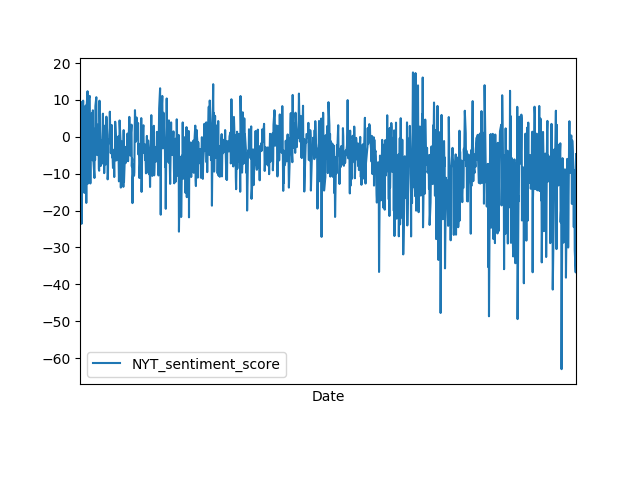

In [68]:
data.reset_index().set_index(['Date']).plot(y='NYT_sentiment_score')